In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans

In [11]:
df_nba = pd.read_csv('2020stats.csv')

FileNotFoundError: [Errno 2] File b'2020stats.csv' does not exist: b'2020stats.csv'

In [12]:
nba = pd.read_csv('2020stats.csv')
nba

,Rk,Player,Pos,Tm,G,MP,PER,TS,3PAr,FTr,...,TOVx,USGx,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Steven Adams,C,OKC,58,1564,20.8,0.605,0.007,0.413,...,14.1,17.2,3.7,2.5,6.2,0.190,2.1,1.1,3.2,2.0
1,2,Bam Adebayo,PF,MIA,65,2235,20.6,0.606,0.018,0.476,...,17.5,20.8,4.6,3.6,8.1,0.175,1.6,2.1,3.6,3.2
2,3,LaMarcus Aldridge,C,SAS,53,1754,19.8,0.571,0.198,0.241,...,7.8,23.6,3.1,1.4,4.4,0.122,1.8,-0.5,1.3,1.5
3,4,Nickeil Alexander-Walker,SG,NOP,41,501,7.6,0.441,0.515,0.123,...,14.3,22.8,-0.7,0.4,-0.4,-0.034,-3.5,-1.4,-4.9,-0.4
4,5,Grayson Allen,SG,MEM,30,498,11.4,0.577,0.517,0.199,...,10.7,17.9,0.5,0.3,0.7,0.070,-1.0,-1.5,-2.6,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,510,Thaddeus Young,PF,CHI,64,1591,13.3,0.521,0.369,0.120,...,13.9,19.7,-0.2,2.1,1.9,0.058,-1.4,0.2,-1.1,0.4
394,511,Trae Young,PG,ATL,60,2120,23.9,0.595,0.455,0.448,...,16.2,34.9,5.4,0.5,5.9,0.134,6.3,-2.3,4.0,3.2
395,512,Cody Zeller,C,CHO,58,1341,18.8,0.576,0.157,0.374,...,11.9,20.8,2.4,1.2,3.6,0.129,0.2,-0.8,-0.6,0.5
396,513,Ante Žižić,C,CLE,22,221,16.4,0.597,0.000,0.264,...,11.1,17.5,0.3,0.2,0.5,0.106,-1.7,-1.5,-3.2,-0.1


In [14]:
clean2 = nba.drop(['Tm'], axis=1)
clean2

,Rk,Player,Pos,G,MP,PER,TS,3PAr,FTr,ORBx,...,TOVx,USGx,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Steven Adams,C,58,1564,20.8,0.605,0.007,0.413,14.4,...,14.1,17.2,3.7,2.5,6.2,0.190,2.1,1.1,3.2,2.0
1,2,Bam Adebayo,PF,65,2235,20.6,0.606,0.018,0.476,8.7,...,17.5,20.8,4.6,3.6,8.1,0.175,1.6,2.1,3.6,3.2
2,3,LaMarcus Aldridge,C,53,1754,19.8,0.571,0.198,0.241,6.3,...,7.8,23.6,3.1,1.4,4.4,0.122,1.8,-0.5,1.3,1.5
3,4,Nickeil Alexander-Walker,SG,41,501,7.6,0.441,0.515,0.123,1.7,...,14.3,22.8,-0.7,0.4,-0.4,-0.034,-3.5,-1.4,-4.9,-0.4
4,5,Grayson Allen,SG,30,498,11.4,0.577,0.517,0.199,1.1,...,10.7,17.9,0.5,0.3,0.7,0.070,-1.0,-1.5,-2.6,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,510,Thaddeus Young,PF,64,1591,13.3,0.521,0.369,0.120,6.2,...,13.9,19.7,-0.2,2.1,1.9,0.058,-1.4,0.2,-1.1,0.4
394,511,Trae Young,PG,60,2120,23.9,0.595,0.455,0.448,1.6,...,16.2,34.9,5.4,0.5,5.9,0.134,6.3,-2.3,4.0,3.2
395,512,Cody Zeller,C,58,1341,18.8,0.576,0.157,0.374,12.6,...,11.9,20.8,2.4,1.2,3.6,0.129,0.2,-0.8,-0.6,0.5
396,513,Ante Žižić,C,22,221,16.4,0.597,0.000,0.264,9.0,...,11.1,17.5,0.3,0.2,0.5,0.106,-1.7,-1.5,-3.2,-0.1


In [15]:
X = clean2.drop(['Player', 'Pos', 'G'], axis=1)
y = clean2['Pos']

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
from sklearn.decomposition import PCA

In [19]:

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())

Cumulative Explained Variance: 0.5854930540464673


In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [21]:
LDA = LinearDiscriminantAnalysis(n_components=2, shrinkage='auto', solver='eigen')

In [22]:
LDA_df = LDA.fit(X_scaled,y).transform(X_scaled)

C:\Users\oakla\Anaconda34\lib\site-packages\sklearn\covariance\shrunk_covariance_.py:209: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
C:\Users\oakla\Anaconda34\lib\site-packages\sklearn\covariance\empirical_covariance_.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
C:\Users\oakla\Anaconda34\lib\site-packages\sklearn\covariance\shrunk_covariance_.py:209: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
C:\Users\oakla\Anaconda34\lib\site-packages\sklearn\covariance\empirical_covariance_.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


In [23]:
LDA.score(X_scaled,y)

0.6532663316582915

In [24]:
kmeans_model = KMeans(n_clusters=9, random_state=1)
kmeans_model.fit(LDA_df)
new_model = kmeans_model.labels_
new_model

array([5, 5, 6, 1, 8, 3, 6, 5, 2, 2, 1, 2, 7, 3, 8, 7, 3, 4, 2, 8, 2, 2,
       1, 0, 2, 6, 7, 8, 8, 5, 1, 2, 1, 0, 0, 5, 6, 7, 8, 8, 6, 7, 3, 7,
       8, 3, 2, 2, 7, 8, 1, 2, 2, 2, 7, 5, 8, 7, 8, 2, 1, 6, 8, 3, 6, 8,
       2, 0, 1, 8, 5, 5, 2, 7, 5, 6, 5, 8, 1, 0, 7, 6, 1, 2, 8, 6, 2, 8,
       8, 8, 0, 5, 6, 0, 4, 1, 5, 2, 0, 7, 8, 7, 8, 8, 2, 1, 7, 3, 8, 1,
       8, 8, 5, 6, 8, 1, 3, 5, 8, 5, 1, 6, 8, 8, 4, 4, 7, 6, 5, 2, 8, 7,
       6, 6, 1, 5, 5, 2, 3, 1, 6, 8, 7, 2, 2, 8, 7, 0, 2, 2, 1, 6, 8, 1,
       2, 0, 8, 2, 2, 1, 2, 5, 5, 6, 5, 6, 5, 8, 2, 8, 1, 8, 1, 7, 2, 6,
       5, 8, 6, 2, 3, 1, 2, 2, 0, 0, 1, 1, 4, 0, 2, 8, 6, 2, 7, 2, 4, 1,
       2, 1, 2, 1, 5, 5, 6, 4, 3, 1, 6, 3, 1, 6, 0, 7, 2, 8, 6, 8, 2, 2,
       5, 8, 2, 1, 8, 0, 8, 8, 5, 1, 0, 7, 7, 6, 6, 6, 6, 0, 7, 2, 0, 5,
       0, 7, 3, 2, 1, 6, 8, 1, 1, 4, 2, 3, 2, 2, 4, 2, 1, 2, 1, 1, 8, 8,
       6, 1, 1, 1, 8, 4, 2, 6, 7, 1, 1, 1, 8, 6, 8, 2, 0, 7, 7, 2, 5, 7,
       1, 6, 2, 3, 2, 5, 1, 2, 6, 8, 2, 6, 6, 5, 6,

In [26]:
clean2['cluster'] = new_model
clean2

,Rk,Player,Pos,G,MP,PER,TS,3PAr,FTr,ORBx,...,USGx,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,cluster
0,1,Steven Adams,C,58,1564,20.8,0.605,0.007,0.413,14.4,...,17.2,3.7,2.5,6.2,0.190,2.1,1.1,3.2,2.0,5
1,2,Bam Adebayo,PF,65,2235,20.6,0.606,0.018,0.476,8.7,...,20.8,4.6,3.6,8.1,0.175,1.6,2.1,3.6,3.2,5
2,3,LaMarcus Aldridge,C,53,1754,19.8,0.571,0.198,0.241,6.3,...,23.6,3.1,1.4,4.4,0.122,1.8,-0.5,1.3,1.5,6
3,4,Nickeil Alexander-Walker,SG,41,501,7.6,0.441,0.515,0.123,1.7,...,22.8,-0.7,0.4,-0.4,-0.034,-3.5,-1.4,-4.9,-0.4,1
4,5,Grayson Allen,SG,30,498,11.4,0.577,0.517,0.199,1.1,...,17.9,0.5,0.3,0.7,0.070,-1.0,-1.5,-2.6,-0.1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,510,Thaddeus Young,PF,64,1591,13.3,0.521,0.369,0.120,6.2,...,19.7,-0.2,2.1,1.9,0.058,-1.4,0.2,-1.1,0.4,2
394,511,Trae Young,PG,60,2120,23.9,0.595,0.455,0.448,1.6,...,34.9,5.4,0.5,5.9,0.134,6.3,-2.3,4.0,3.2,4
395,512,Cody Zeller,C,58,1341,18.8,0.576,0.157,0.374,12.6,...,20.8,2.4,1.2,3.6,0.129,0.2,-0.8,-0.6,0.5,5
396,513,Ante Žižić,C,22,221,16.4,0.597,0.000,0.264,9.0,...,17.5,0.3,0.2,0.5,0.106,-1.7,-1.5,-3.2,-0.1,5


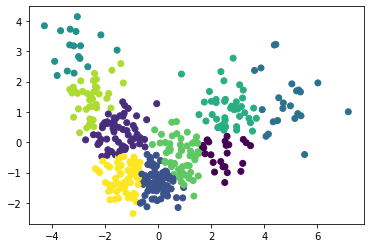

In [27]:
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(LDA_df)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=new_model)
plt.show()

In [28]:
columns = plot_columns

In [29]:
clean2['cluster'] = new_model

clean2.to_csv('advancedstats_df.csv', index=False)

In [30]:
new_model2 = pd.DataFrame(new_model)
new_model2 = new_model2.rename(columns={0: "clusters"})
new_model3 = new_model2['clusters']
new_model3

0      5
1      5
2      6
3      1
4      8
      ..
393    2
394    4
395    5
396    5
397    3
Name: clusters, Length: 398, dtype: int32